In [1]:
from dp_functions import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("small_data.csv")
n = len(data["date"])
epsilon = 1
delta = 0.00001
print(date_to_int("2014-07-04"))
print(count_synthetic(data, "date", "2014-07-04", epsilon, 182, 274, 92, n))
print(data["location"][1])
print(mean_loc_gaussian(data, epsilon, delta, -100, 100))

185
[30 25 29 18 21 19 23 43 40 43 41 34 24 26 38 37 47 41 31 21 34 37 37 44
 40 40 29 38 36 29 49 44 38 35 26 36 30 39 42 27 37 21 46 30 36 30 31 23
 28 25 38 44 48 28 35 35 39 40 39 38 25 27 21 34 45 48 63 51 42 38 38 39
 38 53 63 36 41 44 47 44 45 47 31 42 48 36 62 45 45 44 25 37]
0
(40.8192885, -73.8997237)
(42.14463258195075, -73.69263208951877)


In [20]:
num_trials = 2500

lat_results_laplace = {"bias" : [], "std" : []}
lat_results_gaussian = {"bias" : [], "std" : []}
long_results_laplace = {"bias" : [], "std" : []}
long_results_gaussian = {"bias" : [], "std" : []}

true_mean = mean_loc_exact(data)

delta = 0.00001

for epsilon in tqdm(np.arange(1, 21) * 0.1):
    cur_laplace = np.array([mean_loc_laplace_exper(data, epsilon, -100, 100, true_mean) for i in range(num_trials)])
    cur_laplace = list(map(list, zip(*cur_laplace)))
    cur_gaussian = np.array([mean_loc_gaussian_exper(data, epsilon, delta, -100, 100, true_mean) for i in range(num_trials)])
    cur_gaussian = list(map(list, zip(*cur_gaussian)))
    lat_results_laplace["bias"].append(np.mean(cur_laplace[0]) - true_mean[0])
    lat_results_laplace["std"].append(np.std(cur_laplace[0]))
    lat_results_gaussian["bias"].append(np.mean(cur_gaussian[0]) - true_mean[0])
    lat_results_gaussian["std"].append(np.std(cur_gaussian[0]))
    long_results_laplace["bias"].append(np.mean(cur_laplace[1]) - true_mean[1])
    long_results_laplace["std"].append(np.std(cur_laplace[1]))
    long_results_gaussian["bias"].append(np.mean(cur_gaussian[1]) - true_mean[1])
    long_results_gaussian["std"].append(np.std(cur_gaussian[1]))

100%|██████████| 20/20 [00:03<00:00,  5.32it/s]


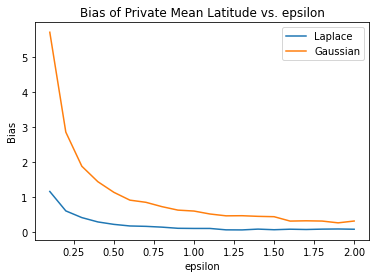

In [21]:
plt.plot(np.arange(1, 21) * 0.1, lat_results_laplace["bias"], label="Laplace");
plt.plot(np.arange(1, 21) * 0.1, lat_results_gaussian["bias"], label="Gaussian");
ax = plt.gca()
plt.title("Bias of Private Mean Latitude vs. epsilon");
plt.xlabel("epsilon");
plt.ylabel("Bias");
plt.legend();
plt.show()

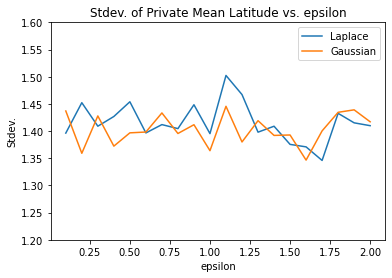

In [29]:
plt.plot(np.arange(1, 21) * 0.1, lat_results_laplace["std"], label="Laplace");
plt.plot(np.arange(1, 21) * 0.1, lat_results_gaussian["std"], label="Gaussian");
ax = plt.gca()
ax.set_ylim([1.2, 1.6])
plt.title("Stdev. of Private Mean Latitude vs. epsilon");
plt.xlabel("epsilon");
plt.ylabel("Stdev.");
plt.legend();
plt.show()

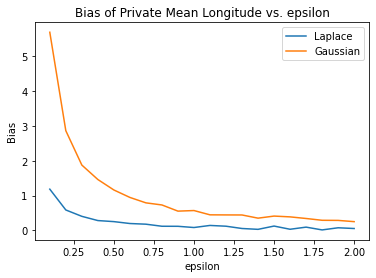

In [23]:
plt.plot(np.arange(1, 21) * 0.1, long_results_laplace["bias"], label="Laplace");
plt.plot(np.arange(1, 21) * 0.1, long_results_gaussian["bias"], label="Gaussian");
ax = plt.gca()
plt.title("Bias of Private Mean Longitude vs. epsilon");
plt.xlabel("epsilon");
plt.ylabel("Bias");
plt.legend();
plt.show()

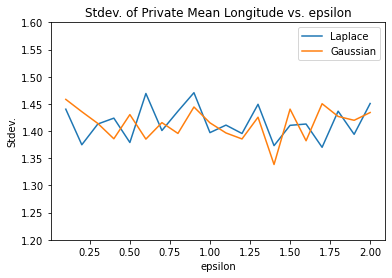

In [30]:
plt.plot(np.arange(1, 21) * 0.1, long_results_laplace["std"], label="Laplace");
plt.plot(np.arange(1, 21) * 0.1, long_results_gaussian["std"], label="Gaussian");
ax = plt.gca()
ax.set_ylim([1.2, 1.6])
plt.title("Stdev. of Private Mean Longitude vs. epsilon");
plt.xlabel("epsilon");
plt.ylabel("Stdev.");
plt.legend();
plt.show()